<a href="https://colab.research.google.com/github/alwaysalearner1234/ML02/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting if a person would buy life insurnace based on his age using logistic regression**





Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


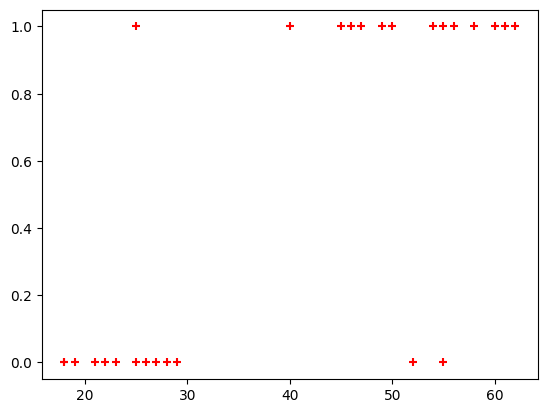

In [38]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)


In [41]:
X_test


,age
2,47
19,18
10,18
11,28
6,55
17,58


In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
X_test

,age
2,47
19,18
10,18
11,28
6,55
17,58


In [45]:
y_predicted = model.predict(X_test)

In [46]:
model.predict_proba(X_test)


array([[0.15636009, 0.84363991],
       [0.94561063, 0.05438937],
       [0.94561063, 0.05438937],
       [0.78410013, 0.21589987],
       [0.05029163, 0.94970837],
       [0.03204333, 0.96795667]])

In [47]:
model.score(X_test,y_test)


0.8333333333333334

In [48]:
y_predicted


array([1, 0, 0, 0, 1, 1])

In [49]:
X_test


,age
2,47
19,18
10,18
11,28
6,55
17,58


model.coef_ indicates value of m in y=m*x + b equation

In [50]:
model.intercept_

array([-5.67435427])

Lets defined sigmoid function now and do the math with hand



In [51]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [52]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [53]:
age = 35
prediction_function(age)

0.4850044983805899

0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [54]:
age = 43
prediction_function(age)


0.568565299077705

Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [55]:
import pandas as pd

df = pd.read_csv("HR_Analytics.csv")  # replace with your actual file path

# Basic overview
print(df.info())
print(df.describe())

# Check attrition distribution
print(df['Attrition'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

KeyError: 'Attrition'

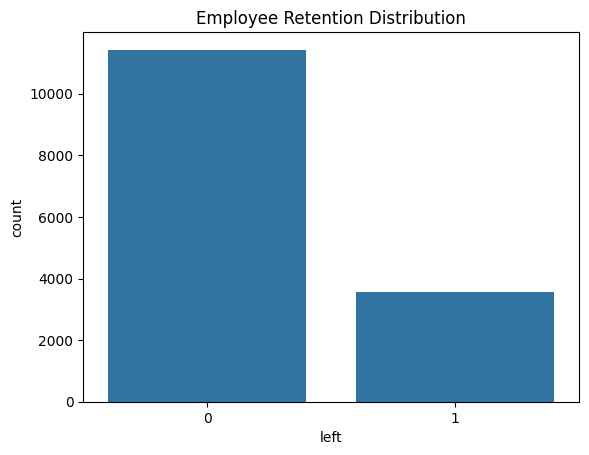

In [57]:
target = 'left'  # replace with your actual column name
sns.countplot(x=target, data=df)
plt.title("Employee Retention Distribution")
plt.show()


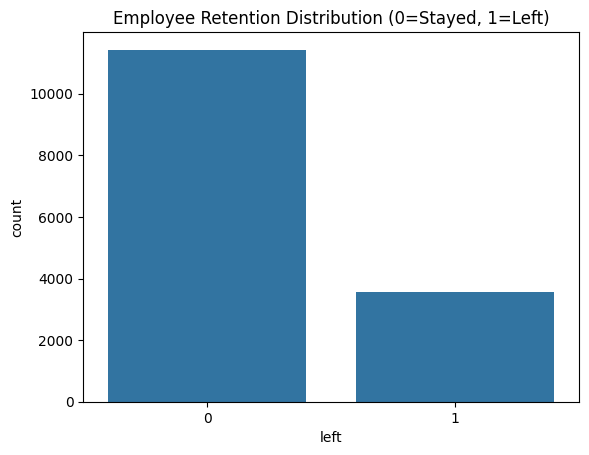

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='left', data=df)
plt.title("Employee Retention Distribution (0=Stayed, 1=Left)")
plt.show()


In [59]:
# List all columns
print(df.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


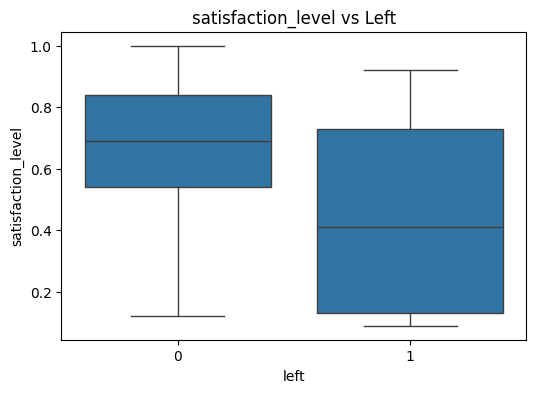

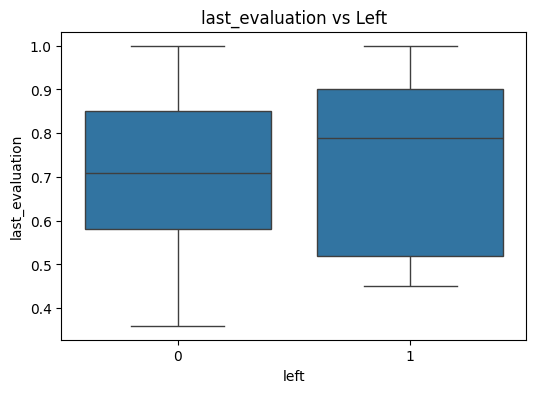

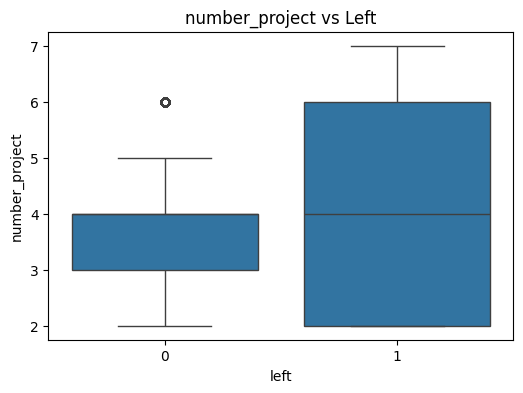

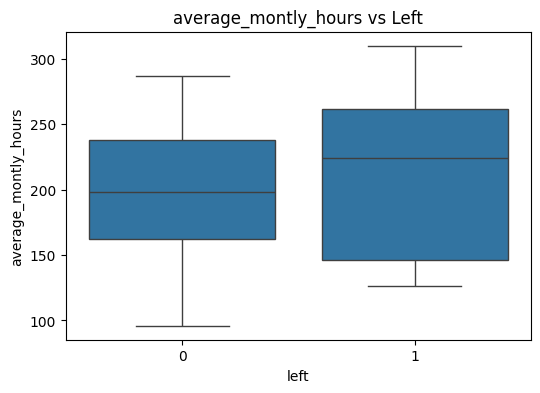

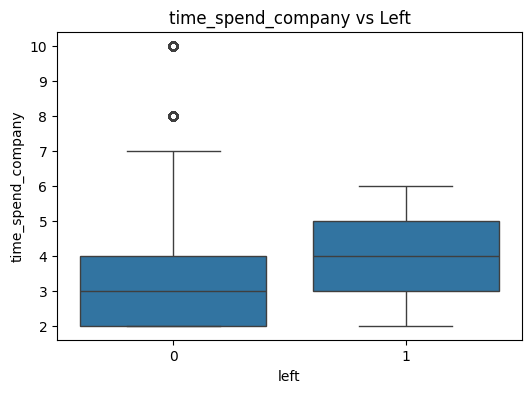

In [60]:
num_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_montly_hours', 'time_spend_company']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='left', y=col, data=df)
    plt.title(f"{col} vs Left")
    plt.show()


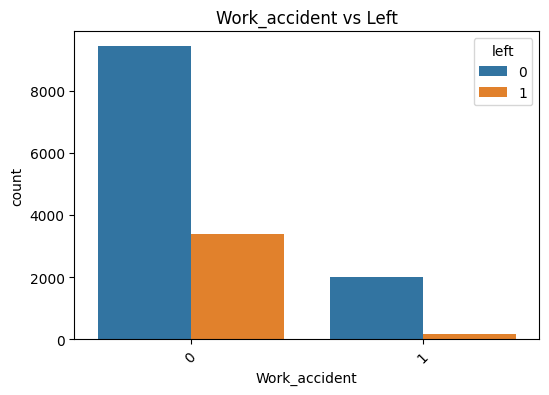

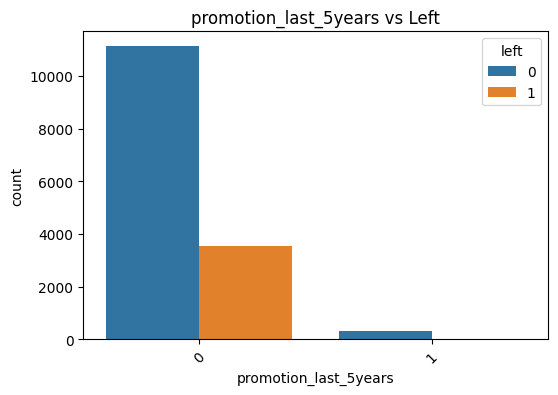

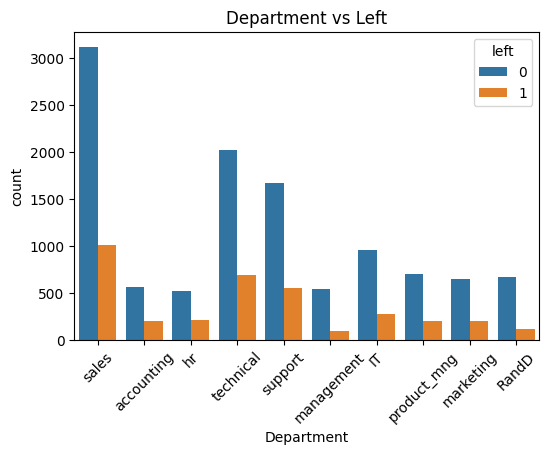

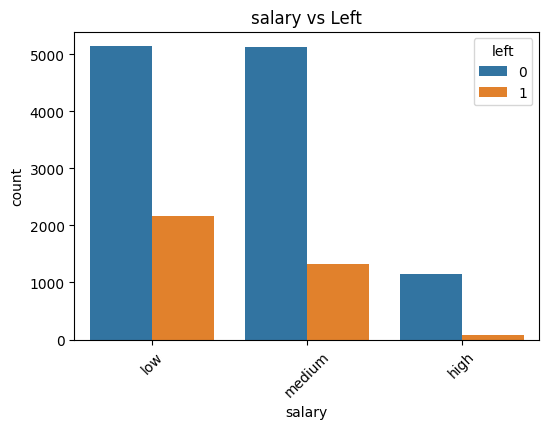

In [61]:
cat_features = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='left', data=df)
    plt.title(f"{col} vs Left")
    plt.xticks(rotation=45)
    plt.show()


In [62]:
corr = df.corr()
print(corr['left'].sort_values(ascending=False))

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'sales'

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


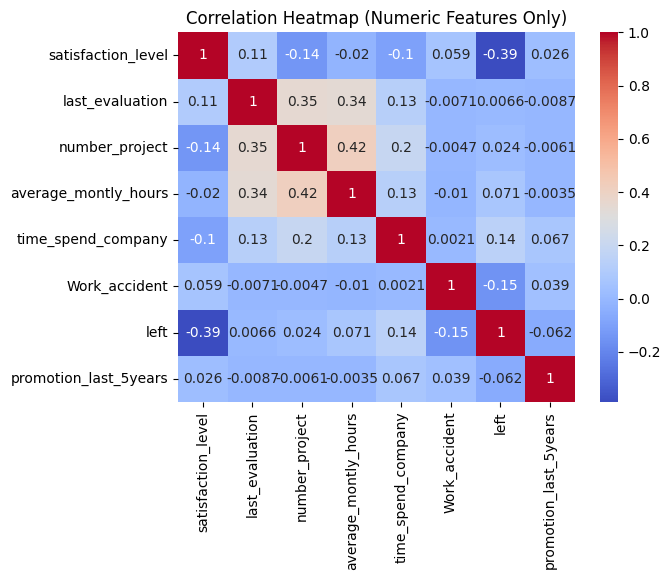

In [63]:
# Select numeric columns only
corr = df.select_dtypes(include=['int64','float64']).corr()

# Show correlation with "left"
print(corr['left'].sort_values(ascending=False))

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [64]:
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['Department','salary'], drop_first=True)

corr = df_encoded.corr()
print(corr['left'].sort_values(ascending=False))


left                      1.000000
time_spend_company        0.144822
salary_low                0.134722
average_montly_hours      0.071287
Department_hr             0.028249
number_project            0.023787
Department_technical      0.020076
Department_accounting     0.015201
Department_support        0.010700
Department_sales          0.009923
last_evaluation           0.006567
Department_marketing     -0.000859
Department_product_mng   -0.011029
Department_management    -0.046035
Department_RandD         -0.046596
promotion_last_5years    -0.061788
salary_medium            -0.068833
Work_accident            -0.154622
satisfaction_level       -0.388375
Name: left, dtype: float64


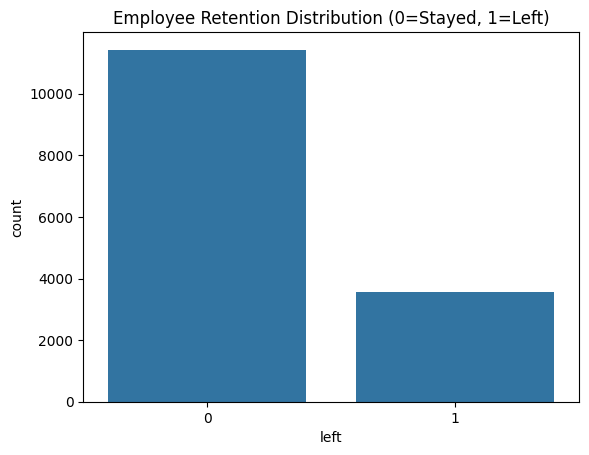

In [65]:
sns.countplot(x='left', data=df)
plt.title("Employee Retention Distribution (0=Stayed, 1=Left)")
plt.show()


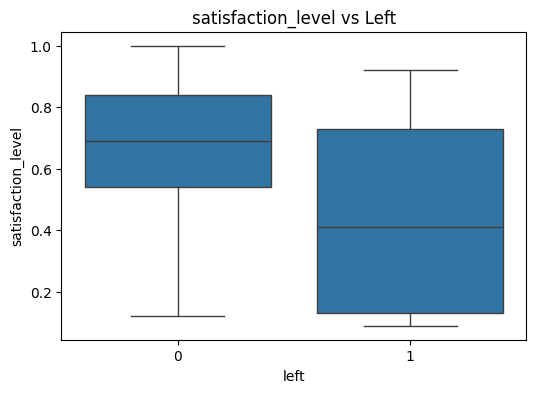

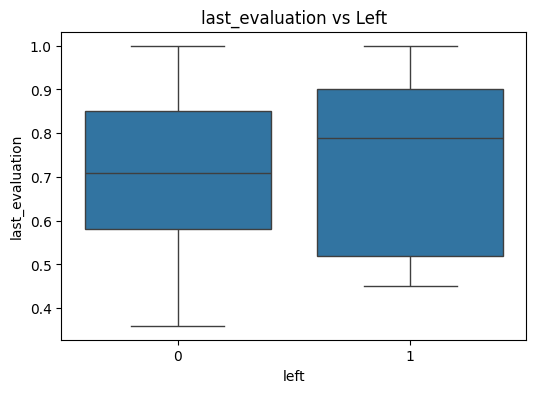

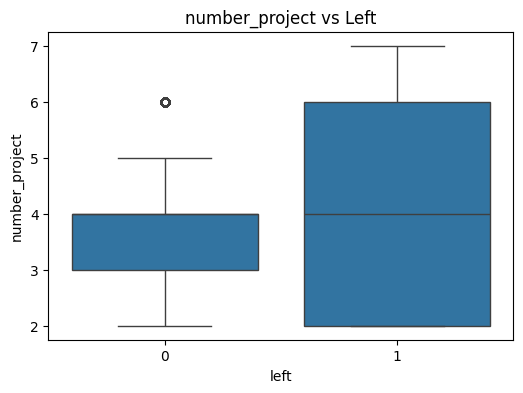

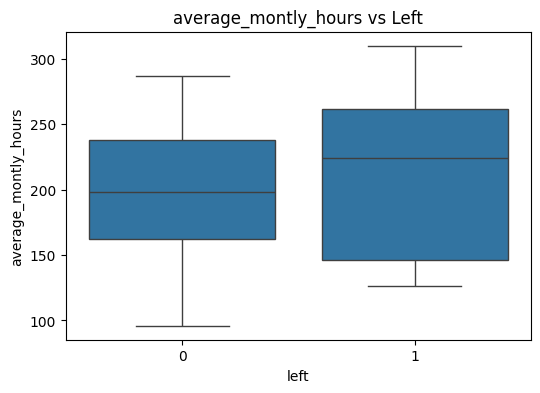

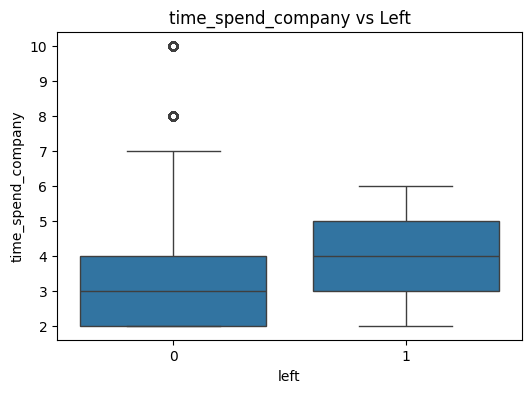

In [66]:
num_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_montly_hours', 'time_spend_company']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='left', y=col, data=df)
    plt.title(f"{col} vs Left")
    plt.show()


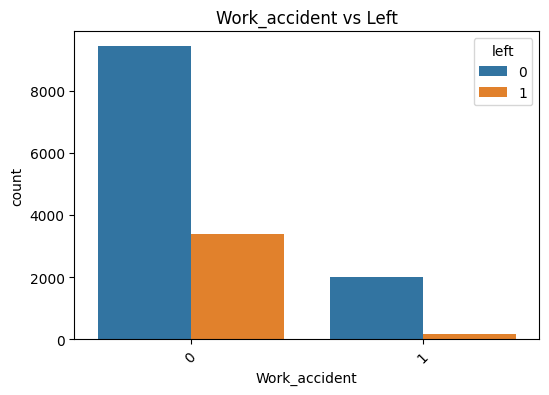

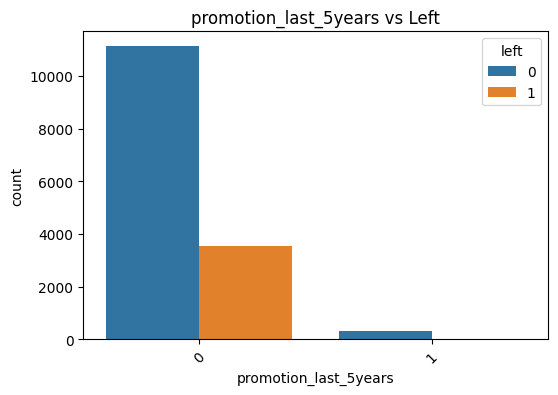

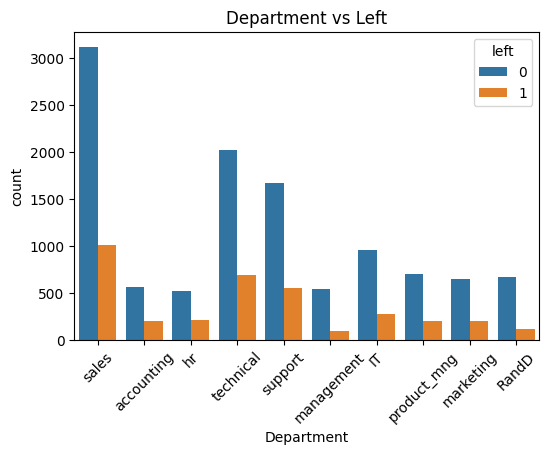

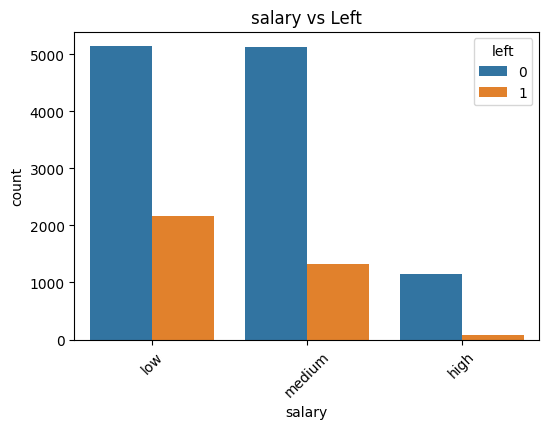

In [67]:
cat_features = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='left', data=df)
    plt.title(f"{col} vs Left")
    plt.xticks(rotation=45)
    plt.show()


In [68]:
corr = df.select_dtypes(include=['int64','float64']).corr()
print(corr['left'].sort_values(ascending=False))


left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


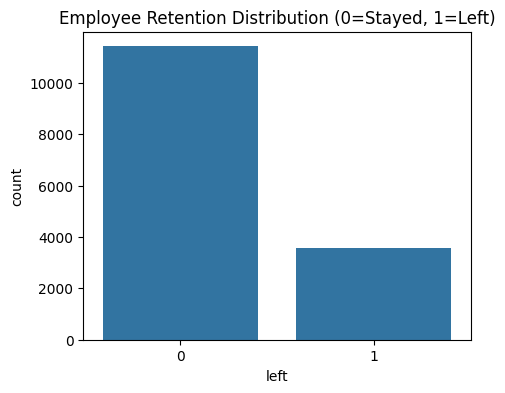


Retention distribution:
left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


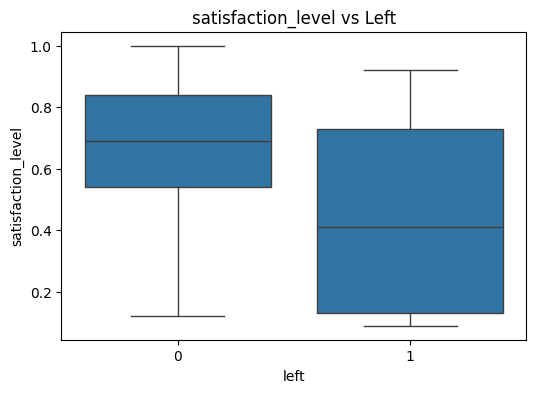

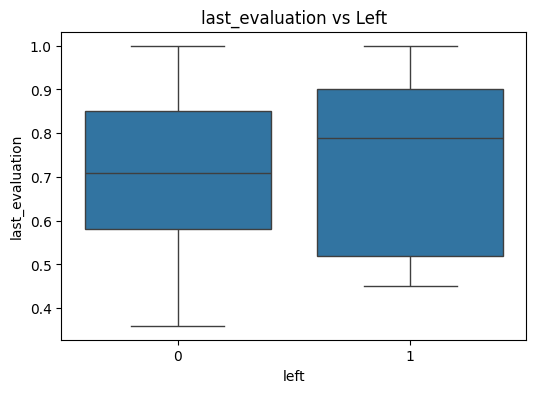

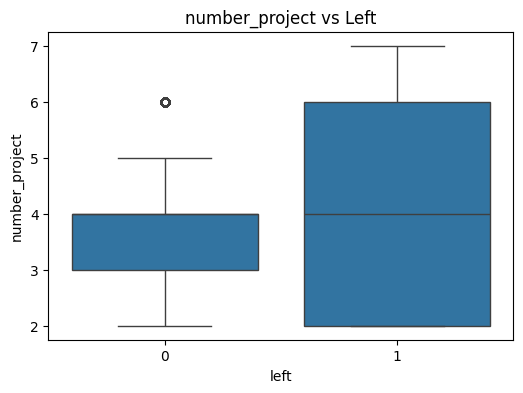

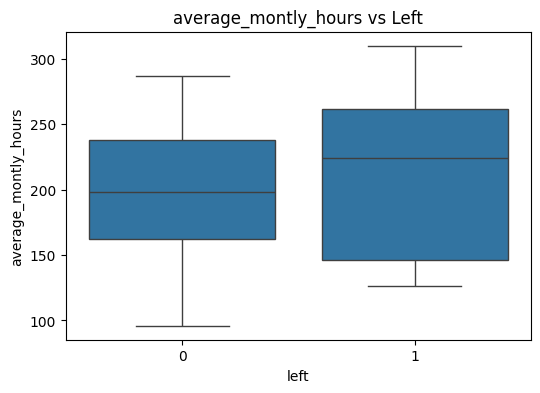

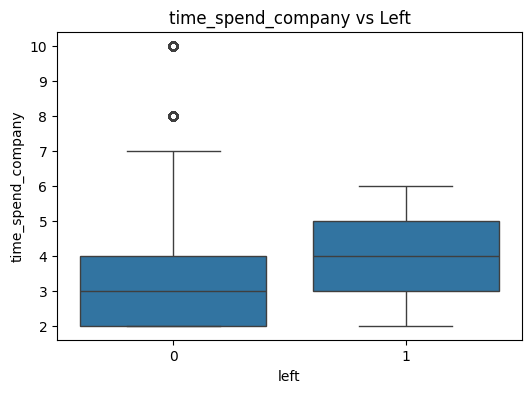

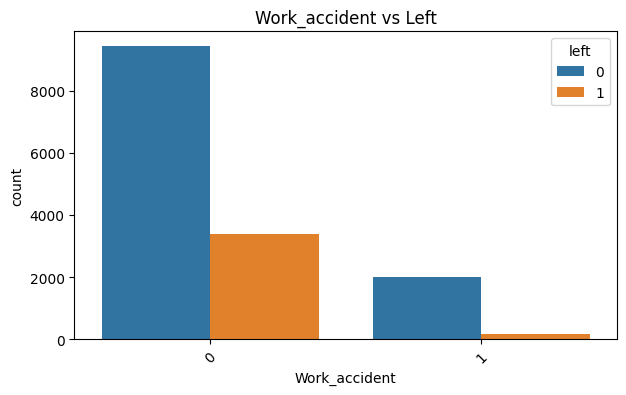

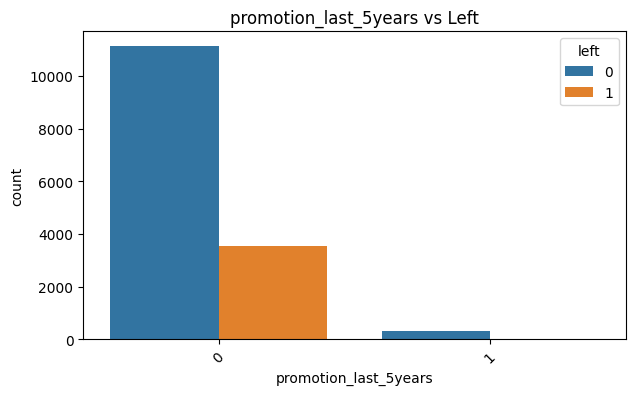

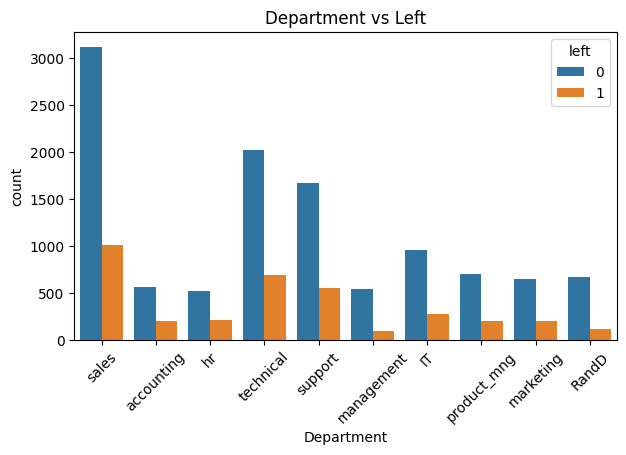

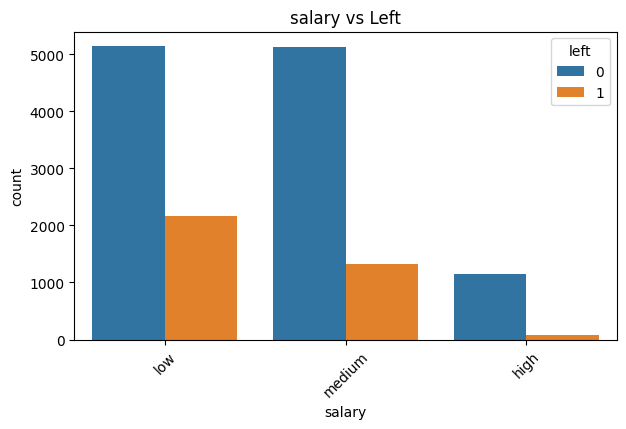

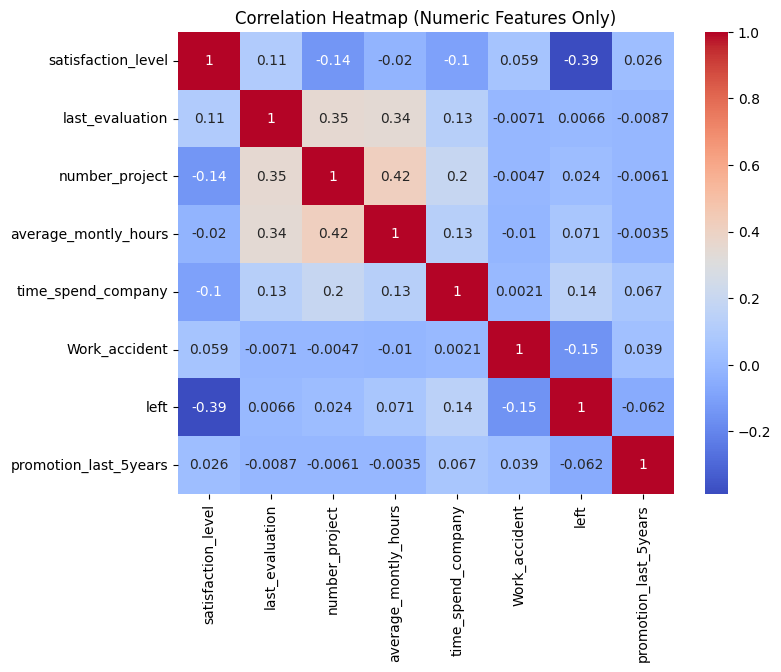


Correlation with Attrition (left):
left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

✅ Key Insights:
- Low satisfaction_level → higher attrition
- Very high or low average_montly_hours → higher attrition
- Number of projects: too few or too many → higher attrition
- Time_spend_company (spike at 5 years) → higher attrition
- Low salary → highest attrition; high salary → lowest
- Lack of promotion in last 5 years → higher attrition
- Work_accident: employees with accidents tend to stay


In [69]:
# 📊 HR Analytics EDA: Employee Retention
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("HR_Analytics.csv")   # 🔹 change filename if needed

# -------------------------------
# 1. Target distribution
# -------------------------------
plt.figure(figsize=(5,4))
sns.countplot(x='left', data=df)
plt.title("Employee Retention Distribution (0=Stayed, 1=Left)")
plt.show()

print("\nRetention distribution:")
print(df['left'].value_counts(normalize=True))

# -------------------------------
# 2. Numerical features vs Attrition
# -------------------------------
num_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_montly_hours', 'time_spend_company']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='left', y=col, data=df)
    plt.title(f"{col} vs Left")
    plt.show()

# -------------------------------
# 3. Categorical features vs Attrition
# -------------------------------
cat_features = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']

for col in cat_features:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue='left', data=df)
    plt.title(f"{col} vs Left")
    plt.xticks(rotation=45)
    plt.show()

# -------------------------------
# 4. Correlation analysis (numeric only)
# -------------------------------
corr = df.select_dtypes(include=['int64','float64']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

print("\nCorrelation with Attrition (left):")
print(corr['left'].sort_values(ascending=False))

# -------------------------------
# 5. Summary: Top influencing factors
# -------------------------------
print("\n✅ Key Insights:")
print("- Low satisfaction_level → higher attrition")
print("- Very high or low average_montly_hours → higher attrition")
print("- Number of projects: too few or too many → higher attrition")
print("- Time_spend_company (spike at 5 years) → higher attrition")
print("- Low salary → highest attrition; high salary → lowest")
print("- Lack of promotion in last 5 years → higher attrition")
print("- Work_accident: employees with accidents tend to stay")


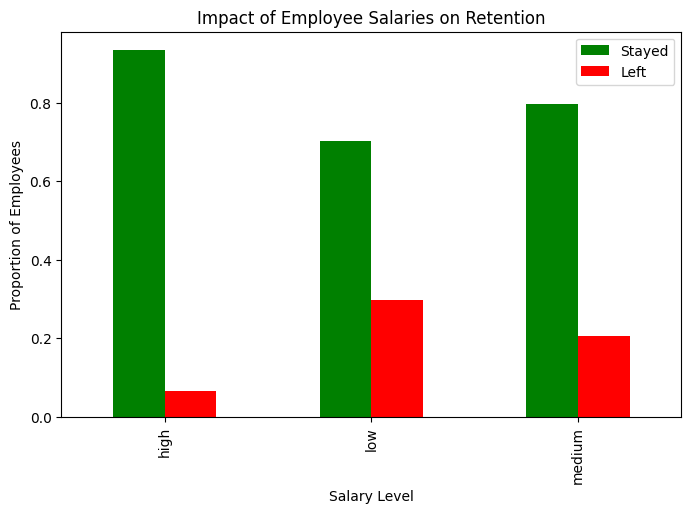

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is in df and has columns 'salary' and 'left'

# Group by salary and calculate retention (i.e., stayed = 1 - left)
retention_by_salary = df.groupby('salary')['left'].value_counts(normalize=True).unstack()

# Plot bar chart
retention_by_salary.plot(kind='bar', stacked=False, figsize=(8,5), color=['green', 'red'])
plt.title("Impact of Employee Salaries on Retention")
plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees")
plt.legend(["Stayed", "Left"])
plt.show()


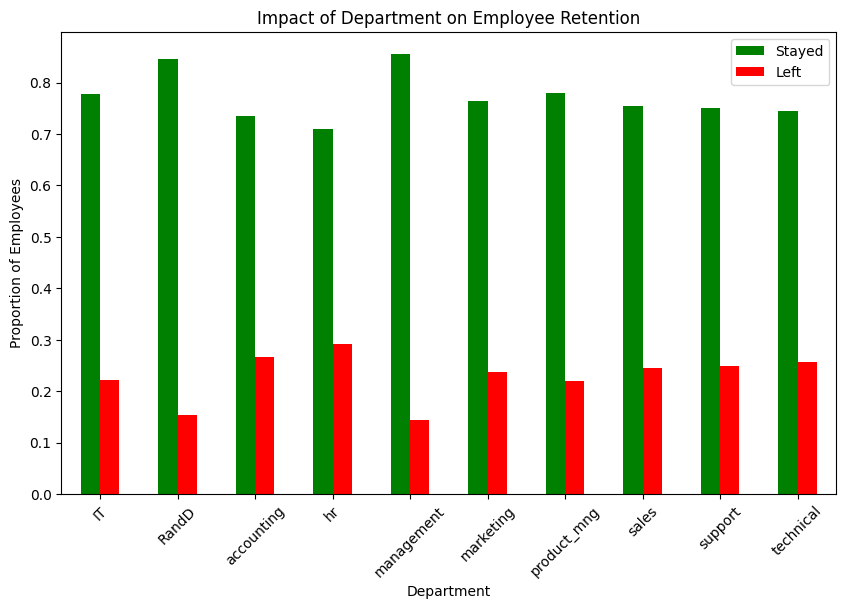

In [71]:
import matplotlib.pyplot as plt

# Group by department and retention status
dept_retention = df.groupby('Department')['left'].value_counts(normalize=True).unstack()

# Plot
dept_retention.plot(kind='bar', stacked=False, figsize=(10,6), color=['green', 'red'])
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Proportion of Employees")
plt.legend(["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()


In [72]:
# Initialize model
logreg = LogisticRegression(max_iter=1000)

# Train model
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)


NameError: name 'X_train_scaled' is not defined

In [73]:
# Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# Initialize model
logreg = LogisticRegression(max_iter=1000)

# Train model on raw features
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Optional: evaluate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8333333333333334


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
# --- Imports ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- Example: load data ---
# Replace with your dataset
# df = pd.read_csv("your_data.csv")
# X = df.drop('target', axis=1)
# y = df['target']

# For demo, let's create dummy data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Logistic Regression ---
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = logreg.predict(X_test_scaled)

# --- Evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        50
           1       0.88      0.74      0.80        50

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100



In [76]:
# --- Imports ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- Load your dataset ---
# df = pd.read_csv("your_data.csv")
# y = df['target']   # replace 'target' with your dependent variable
# X = df[["feature1","feature2","feature3"]]  # replace with features selected in Step 1

# Example using dummy data (replace with your actual selected features)
from sklearn.datasets import make_classification
X_full, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=2, random_state=42)
# Suppose Step 1 narrowed it down to features 0, 2, 4
selected_features = [0,2,4]
X = X_full[:, selected_features]

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Logistic Regression ---
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = logreg.predict(X_test_scaled)

# --- Evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        50
           1       0.80      0.66      0.73        50

    accuracy                           0.75       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.76      0.75      0.75       100

